# 🚀 Data Analysis of YC AI Startups

In [16]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_excel('YC AI Startups.xlsx')
df.head()

,Company Name,Tagline / Description,YC Company URL,Batch,Location,All Tags,B2B/B2C,Logo URL
0,Uplift AI,Foundational Voice AI for underserved languages,https://www.ycombinator.com/companies/uplift-ai,Summer 2025,"San Francisco, CA, USA","speech-recognition, conversational-ai, voice-t...",B2B,https://bookface-images.s3.amazonaws.com/small...
1,Luminal,Simple ML framework and cloud for generating f...,https://www.ycombinator.com/companies/luminal,Summer 2025,"San Francisco, CA, USA","machine-learning, open-source, cloud-computing...",B2B,https://bookface-images.s3.amazonaws.com/small...
2,Outrove,Ultra-realistic AI Recruiter,https://www.ycombinator.com/companies/outrove,Summer 2025,"San Francisco, CA, USA","recruiting, ai, video-interviews",B2B,https://bookface-images.s3.amazonaws.com/small...
3,Vulcan Technologies,AI legal cartography,https://www.ycombinator.com/companies/vulcan-t...,Summer 2025,"San Francisco, CA, USA","legal, ai, regulatory-compliance, government",B2B,https://bookface-images.s3.amazonaws.com/small...
4,TectoAI,Governance for AI Employees,https://www.ycombinator.com/companies/tectoai,Summer 2025,"San Francisco, CA, USA","ai-governance, enterprise-software, compliance",B2B,https://bookface-images.s3.amazonaws.com/small...


In [15]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Company Name           537 non-null    object
 1   Tagline / Description  537 non-null    object
 2   YC Company URL         537 non-null    object
 3   Batch                  537 non-null    object
 4   Location               537 non-null    object
 5   All Tags               537 non-null    object
 6   B2B/B2C                537 non-null    object
 7   Logo URL               537 non-null    object
dtypes: object(8)
memory usage: 33.7+ KB


,Company Name,Tagline / Description,YC Company URL,Batch,Location,All Tags,B2B/B2C,Logo URL
count,537,537,537,537,537,537,537,537
unique,535,536,537,7,38,463,2,537
top,Scout,AWS for AI Agents,https://www.ycombinator.com/companies/uplift-ai,Summer 2024,"San Francisco, CA, USA","Engineering, Product and Design",B2B,https://bookface-images.s3.amazonaws.com/small...
freq,2,2,1,126,420,15,491,1


### 📅 Batch Analysis: Growth of AI Startups Over Time

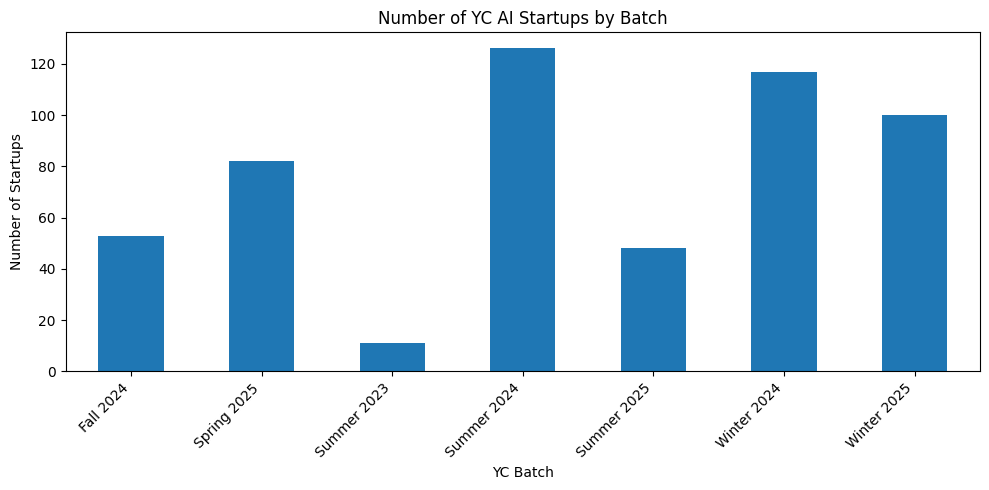

In [9]:
# Count startups by batch
batch_counts = df['Batch'].value_counts().sort_index()

# Plot the chart
plt.figure(figsize=(10, 5))
batch_counts.plot(kind='bar')
plt.title('Number of YC AI Startups by Batch')
plt.xlabel('YC Batch')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Count startups by location
location_counts = df['Location'].value_counts()

# Show the top 10 locations
location_counts.head(10)

Location
San Francisco, CA, USA             420
New York, NY, USA                   41
Remote                              15
London, England, United Kingdom     12
Berlin, Berlin, Germany              4
Stanford, CA, USA                    3
Los Angeles, CA, USA                 3
Paris, Île-de-France, France         3
Seattle, WA, USA                     2
Toronto, ON, Canada                  2
Name: count, dtype: int64

### 📍 Location Analysis (City-Level)

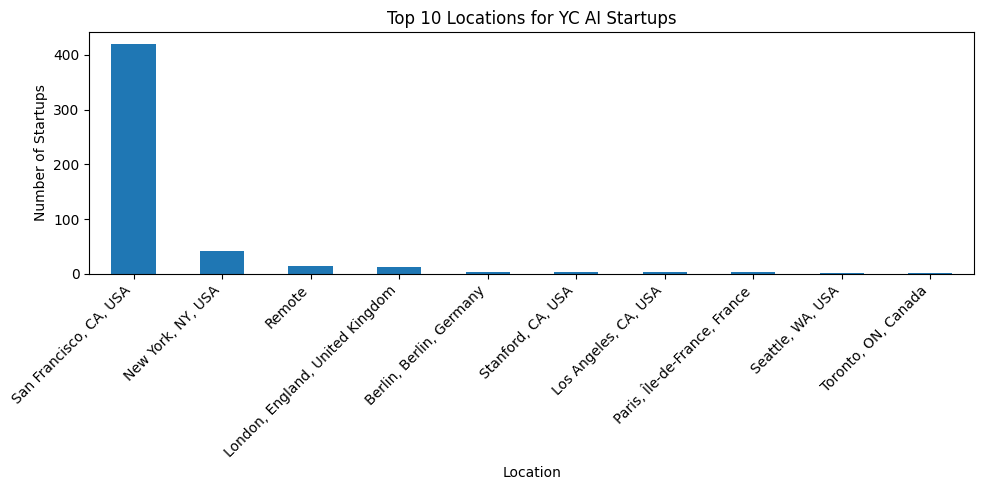

In [17]:
# Plot top 10 locations
plt.figure(figsize=(10, 5))
location_counts.head(10).plot(kind='bar')
plt.title('Top 10 Locations for YC AI Startups')
plt.xlabel('Location')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🌎 Location Analysis (Country-Level)

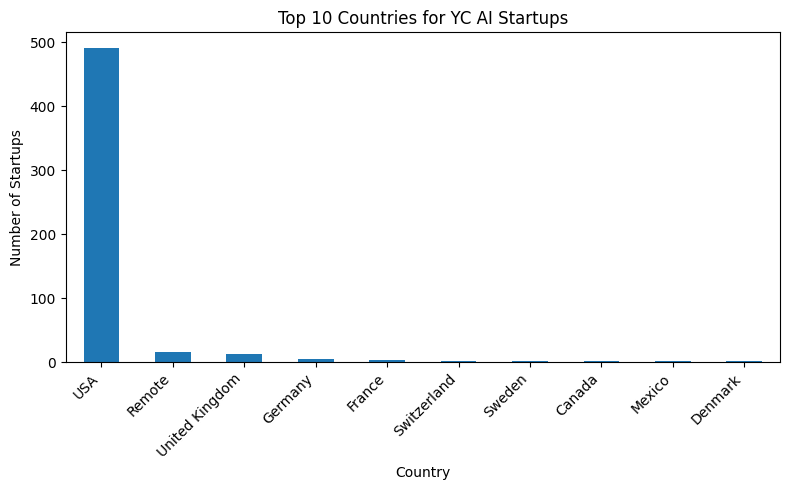

In [12]:
# Extract country from the Location column
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

# Count startups by country
country_counts = df['Country'].value_counts()

# Plot top countries
plt.figure(figsize=(8, 5))
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries for YC AI Startups')
plt.xlabel('Country')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🏷️ Tag Analysis: Startup Categories

In [18]:
# Drop missing values and split tags by comma
all_tags = df['All Tags'].dropna().str.split(', ')

# Flatten the list of lists
flat_tags = [tag for sublist in all_tags for tag in sublist]

# Count tag frequency
tag_counts = pd.Series(flat_tags).value_counts()

# Display top 10 tags
tag_counts.head(10)

Engineering                       56
Product and Design                56
AI                                52
Healthcare                        36
engineering-product-and-design    32
ai-agents                         32
healthcare                        24
B2B SaaS                          23
Consumer                          22
ai                                22
Name: count, dtype: int64

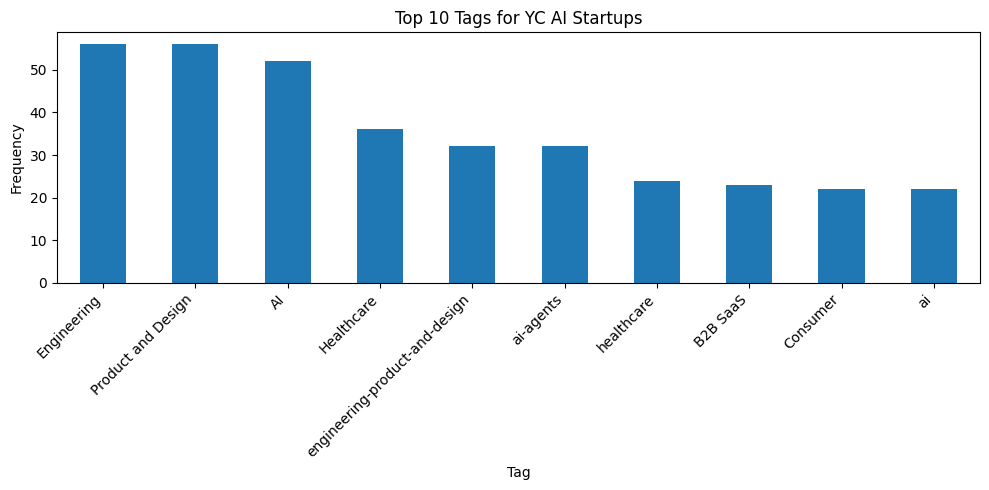

In [19]:
plt.figure(figsize=(10, 5))
tag_counts.head(10).plot(kind='bar')
plt.title('Top 10 Tags for YC AI Startups')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


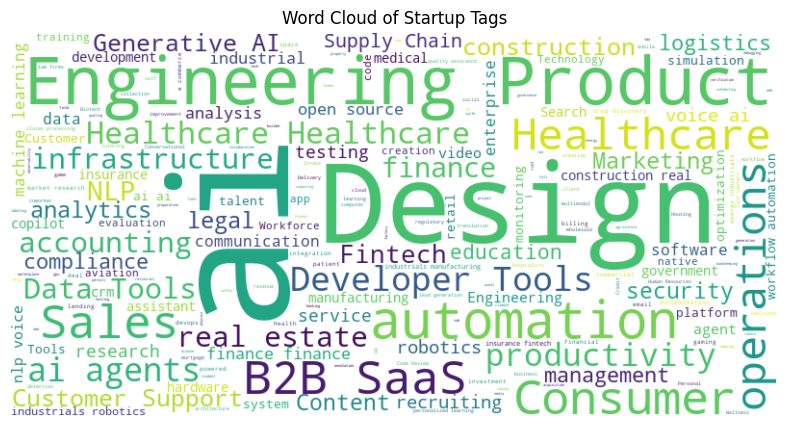

In [22]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(flat_tags))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Startup Tags')
plt.show()

### 🏢 B2B vs 🛒 B2C Distribution

In [26]:
# Count startups by B2B/B2C
b2b_counts = df['B2B/B2C'].value_counts()

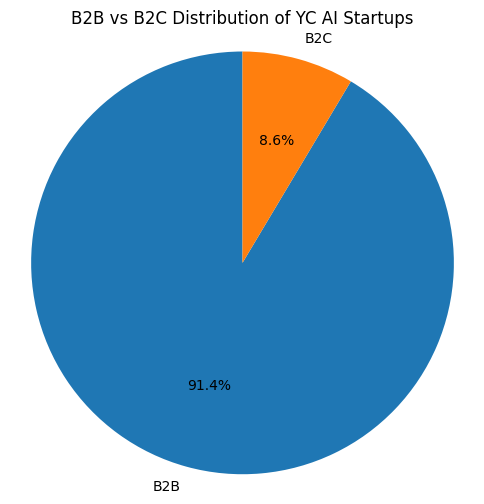

B2B/B2C
B2B    491
B2C     46
Name: count, dtype: int64

In [27]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(b2b_counts, labels=b2b_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('B2B vs B2C Distribution of YC AI Startups')
plt.axis('equal')  # Ensures pie chart is a perfect circle
plt.show()

b2b_counts